In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt
import os 

In [71]:
print(os.listdir('C:/Users/Arvind/Desktop/Projects/Olympic History Data-Analysis'))

['athlete_events.csv', 'athlete_events.csv.zip', 'noc_regions.csv', 'world_gdp.csv', 'world_pop.csv']


In [72]:
plt.style.use('ggplot')

In [73]:
df=pd.read_csv('C:/Users/Arvind/Desktop/Projects/Olympic History Data-Analysis/athlete_events.csv')

In [74]:
df.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [75]:
df.shape

(271116, 15)

In [76]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [77]:
df['Age'].dtype.kind

'f'

In [78]:
df1 = df[~pd.isnull(df['Age'])]

There are missing values in columns Age, Height, Weight and Medal. I am going to process data preprocessing; replacing missing values by the imputation method. Before replacing null values let's see the distribution of Age, Height and weight. 

C:\Users\Arvind\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


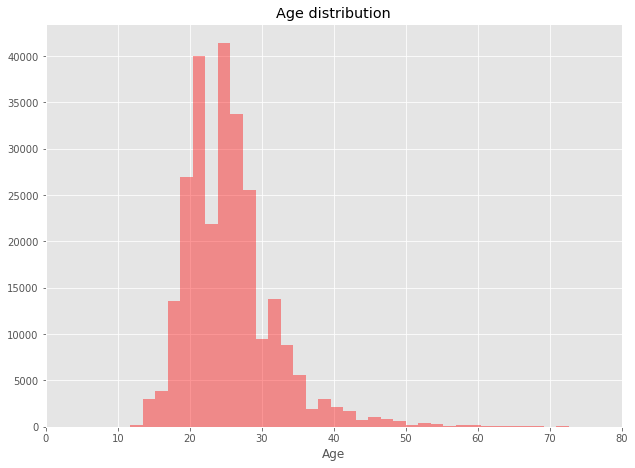

In [79]:
fig=plt.figure(figsize=(10,7))
axes= fig.add_axes([0.1,0.1,0.8,0.8])
sns.distplot(df1['Age'],kde=False, color='r')
plt.title('Age distribution')
axes.set_xlim(0, 80)
plt.show()

In [80]:
df1 = df[~pd.isnull(df['Height'])]

C:\Users\Arvind\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


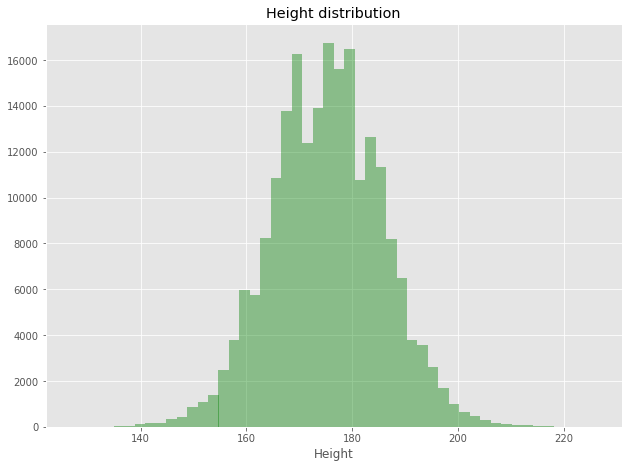

In [81]:
fig=plt.figure(figsize=(10,7))
axes= fig.add_axes([0.1,0.1,0.8,0.8])
sns.distplot(df1['Height'],kde=False, color='g')
plt.title('Height distribution')
#axes.set_xlim(20, 170)
plt.show()

In [82]:
df1 = df[~pd.isnull(df['Weight'])]

C:\Users\Arvind\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


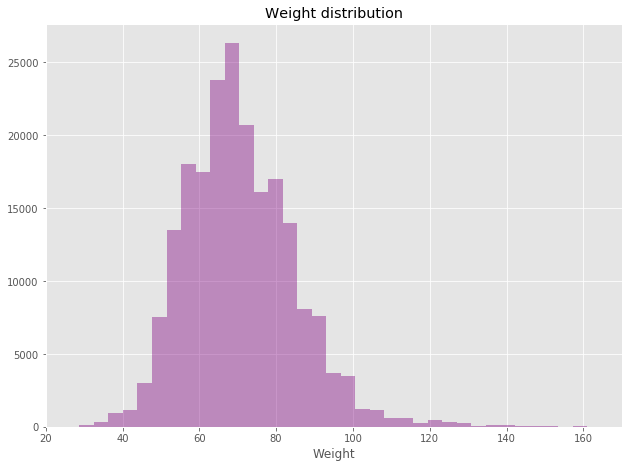

In [83]:
fig=plt.figure(figsize=(10,7))
axes= fig.add_axes([0.1,0.1,0.8,0.8])
sns.distplot(df1['Weight'],kde=False, color='purple')
plt.title('Weight distribution')
axes.set_xlim(20, 170)
plt.show()

In [84]:
AgeMean = int(df['Age'].mean())
print('Age Mean', AgeMean)
df['Age'] = df['Age'].fillna(AgeMean)
df['Age'].isna().sum()



Age Mean 25


0

In [85]:


HeightMode = df['Height'].mode()[0] ## 0 -> the column wise mode 
print('Height Mode',HeightMode)
df['Height'] = df['Height'].fillna(HeightMode)
df['Height'].isna().sum()


WeightMode = df['Weight'].mode()[0]
print('Weight Mode',WeightMode)
df['Weight'] = df['Weight'].fillna(WeightMode)
df['Weight'].isna().sum()

##The Medal column has NaN values if no medal is won , we Substitute the NaN values with a string 'None'

df['Medal'] = df['Medal'].fillna('None')
df['Medal'].isna().sum()

Height Mode 180.0
Weight Mode 70.0


0

In [86]:
df.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

We have cleaned the data. Also, we have two csv files. Let's merge noc_region csv into athelete_events.csv. Later on we can modify columns and use those. 

In [87]:
noc_df= pd.read_csv('C:/Users/Arvind/Desktop/Projects/Olympic History Data-Analysis/noc_regions.csv')

In [88]:
noc_df.isnull().sum()

NOC         0
region      3
notes     209
dtype: int64

In [89]:
noc_df.head(5)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [90]:
noc_df.drop('notes', axis = 1 , inplace = True)

In [91]:
noc_df.rename(columns={'region':'country'}, inplace = True)

In [92]:
noc_df.head(5)

,NOC,country
0,AFG,Afghanistan
1,AHO,Curacao
2,ALB,Albania
3,ALG,Algeria
4,AND,Andorra


In [93]:
olympics_merge_df = df.merge(noc_df,
                                left_on = 'NOC',
                                right_on = 'NOC',
                                how = 'left')

In [94]:
olympics_merge_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,country
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,China
2,3,Gunnar Nielsen Aaby,M,24.0,180.0,70.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,180.0,70.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None,Netherlands


In [95]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
2,3,Gunnar Nielsen Aaby,M,24.0,180.0,70.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None
3,4,Edgar Lindenau Aabye,M,34.0,180.0,70.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None


In [96]:
olympics_merge_df['country'].isnull().sum()

370

In [97]:
from sqlalchemy.engine import create_engine


In [98]:
olympics_merge_df.loc[olympics_merge_df['country'].isnull(),['NOC', 'Team']].drop_duplicates()
olympics_merge_df.shape

(271116, 16)

In [99]:
print(os.listdir('C:/Users/Arvind/Desktop/Projects/Olympic History Data-Analysis'))

['athlete_events.csv', 'athlete_events.csv.zip', 'noc_regions.csv', 'world_gdp.csv', 'world_pop.csv']


In [100]:
gdp_df=pd.read_csv('C:/Users/Arvind/Desktop/Projects/Olympic History Data-Analysis/world_gdp.csv', skiprows=3)

In [101]:
gdp_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,9.843842e+09,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10,1.921556e+10,1.946902e+10
1,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.070101e+10,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.133526e+10,1.186387e+10
2,Algeria,DZA,GDP (current US$),NY.GDP.MKTP.CD,2.723649e+09,2.434777e+09,2.001469e+09,2.703015e+09,2.909352e+09,3.136259e+09,...,1.349770e+11,1.710010e+11,1.372110e+11,1.612070e+11,2.000190e+11,2.090590e+11,2.097550e+11,2.138100e+11,1.658740e+11,1.590490e+11
3,American Samoa,ASM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.200000e+08,5.630000e+08,6.780000e+08,5.760000e+08,5.740000e+08,6.440000e+08,6.410000e+08,6.430000e+08,6.590000e+08,6.580000e+08
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.016972e+09,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.858518e+09


In [102]:
gdp_df.drop(['Indicator Name', 'Indicator Code'], axis=1, inplace=True)

In [103]:
gdp_df.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,AFG,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,...,9.843842e+09,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10,1.921556e+10,1.946902e+10
1,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.070101e+10,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.133526e+10,1.186387e+10
2,Algeria,DZA,2.723649e+09,2.434777e+09,2.001469e+09,2.703015e+09,2.909352e+09,3.136259e+09,3.039835e+09,3.370843e+09,...,1.349770e+11,1.710010e+11,1.372110e+11,1.612070e+11,2.000190e+11,2.090590e+11,2.097550e+11,2.138100e+11,1.658740e+11,1.590490e+11
3,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.200000e+08,5.630000e+08,6.780000e+08,5.760000e+08,5.740000e+08,6.440000e+08,6.410000e+08,6.430000e+08,6.590000e+08,6.580000e+08
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.016972e+09,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.858518e+09


In [104]:
gdp_df=pd.melt(gdp_df, id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='GDP')

In [105]:
gdp_df.head()

,Country Name,Country Code,Year,GDP
0,Afghanistan,AFG,1960,5.377778e+08
1,Albania,ALB,1960,NaN
2,Algeria,DZA,1960,2.723649e+09
3,American Samoa,ASM,1960,NaN
4,Andorra,AND,1960,NaN


In [106]:
gdp_df['Year']=pd.to_numeric(gdp_df['Year'])

In [107]:
gdp_df.head()

,Country Name,Country Code,Year,GDP
0,Afghanistan,AFG,1960,5.377778e+08
1,Albania,ALB,1960,NaN
2,Algeria,DZA,1960,2.723649e+09
3,American Samoa,ASM,1960,NaN
4,Andorra,AND,1960,NaN


In [108]:
olympics_merge_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,country
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,China
2,3,Gunnar Nielsen Aaby,M,24.0,180.0,70.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,180.0,70.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None,Netherlands


In [109]:
#let us see if there are any null values in the column country
olympics_merge_df['country'].isnull().sum()

370

There are 370 missing values in the coulumn country. Let us replace them.


In [110]:
#Replace missing Teams by the values above.
olympics_merge_df.loc[olympics_merge_df['country'].isnull(), ['country']] = olympics_merge_df['Team']



In [111]:
olympics_merge_df['country'].isnull().sum()

0

We have replaced the null values in the column country with values of column Team.

In [112]:
#let's replace some values in NOC column with better names and put them in column country for our understanding and convenience.
olympics_merge_df['country'] = np.where(olympics_merge_df['NOC']=='SGP', 'Singapore', olympics_merge_df['country'])
olympics_merge_df['country'] = np.where(olympics_merge_df['NOC']=='ROT', 'Refugee Olympic Athletes', olympics_merge_df['country'])
olympics_merge_df['country'] = np.where(olympics_merge_df['NOC']=='UNK', 'Unknown', olympics_merge_df['country'])
olympics_merge_df['country'] = np.where(olympics_merge_df['NOC']=='TUV', 'Tuvalu', olympics_merge_df['country'])


In [113]:
#As we have same values in country and Teams, let's drop column team and rename the column country as Team. 

olympics_merge_df.drop('Team', axis=1, inplace=True)
olympics_merge_df.rename(columns={'country':'Team'}, inplace=True)

In [114]:
#let's check the df again
olympics_merge_df.head()

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,China
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,China
2,3,Gunnar Nielsen Aaby,M,24.0,180.0,70.0,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,180.0,70.0,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None,Netherlands


In [118]:
#Now, let's merge gdp dataframe that we created earlier into olympics_merge_df
olympics_merge_df = df.merge(gdp_df[['Country Name', 'Country Code']].drop_duplicates(),
                                left_on = 'Team',
                                right_on = 'Country Name',
                                how = 'left')

In [136]:
olympics_merge_df = olympics_merge_df.merge(gdp_df,
                                                left_on = ['Country Code', 'Year'],
                                                right_on = ['Country Code', 'Year'],
                                                how = 'left')

In [137]:
#let's check the merged df
olympics_merge_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country Code,Country Name,GDP
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,CHN,China,4.269160e+11
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,CHN,China,8.560550e+12
2,3,Gunnar Nielsen Aaby,M,24.0,180.0,70.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None,DNK,NaN,NaN
3,4,Edgar Lindenau Aabye,M,34.0,180.0,70.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,NaN,NaN,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None,NLD,Netherlands,2.585680e+11


In [120]:
olympics_merge_df.drop('Country Name', axis=1, inplace=True)

In [121]:
population_df=pd.read_csv('C:/Users/Arvind/Desktop/Projects/Olympic History Data-Analysis/world_pop.csv')

In [122]:
population_df.head()

,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281


In [123]:
population_df.drop(['Indicator Name', 'Indicator Code'], axis=1, inplace= True )

In [124]:
population_df.head()

,Country,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822
1,Afghanistan,AFG,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032
2,Angola,AGO,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463
3,Albania,ALB,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101
4,Andorra,AND,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281


In [125]:
population_df=pd.melt(population_df, id_vars=['Country', 'Country Code'], var_name='Year', value_name='Population')

In [130]:

population_df['Year'] = pd.to_numeric(population_df['Year'])

In [132]:
population_df.head()

,Country,Country Code,Year,Population
0,Aruba,ABW,1960,54211.0
1,Afghanistan,AFG,1960,8996351.0
2,Angola,AGO,1960,5643182.0
3,Albania,ALB,1960,1608800.0
4,Andorra,AND,1960,13411.0


In [139]:
olympics_complete = olympics_merge_df.merge(population_df,
                                            left_on = ['Country Code', 'Year'],
                                            right_on= ['Country Code', 'Year'],
                                            how = 'left')

olympics_complete.drop('Country', axis = 1, inplace = True)

olympics_complete.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country Code,Country Name,GDP,Population
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,CHN,China,4.269160e+11,1.164970e+09
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,CHN,China,8.560550e+12,1.350695e+09
2,3,Gunnar Nielsen Aaby,M,24.0,180.0,70.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None,DNK,NaN,NaN,NaN
3,4,Edgar Lindenau Aabye,M,34.0,180.0,70.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,NaN,NaN,NaN,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None,NLD,Netherlands,2.585680e+11,1.476009e+07
